# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Machine Learning Operations**

**Tecnológico de Monterrey**

Prof Dr. Gerardo Rodríguez Hernández

Fase 1 del proyecto

**Online News**

**Equipo 15:**

*   Cesar Armando Prieto Siller - A01796382
*   Juan Pablo Treviño Lozano - A01197363
*   Scarlet Marie Wessin Romero - A01796242
*   Jorge Roberto Rivera Maldonado - A01796461
*   Jose Francisco Gonzalez Vargas - A01796612








In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import mlflow
from mlflow.models import infer_signature
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import os

In [4]:
print(os.getcwd())

c:\Users\priet\OneDrive\Documents\GitHub\MLOpsEq15\notebooks


In [5]:
original_news_df = pd.read_csv('../data/raw/online_news_original.csv')
original_news_df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [6]:
news_df = pd.read_csv('../data/raw/online_news_modified.csv')
news_df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,mixed_type_col
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594466988,0.999999992308,0.815384609112,4.0,2.0,1.0,...,0.7,-0.35,-0.6,-3.4000000000000004,0.5,-0.1875,0.0,0.1875,593.0,bad
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743080614,0.999999993289,0.79194630341,3.0,1.0,1.0,...,0.7,-0.11875,-0.125,-0.1,0.0,0.0,0.5,0.0,711.0,639
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575129530699,0.999999991597,0.66386554064,3.0,1.0,1.0,...,1.0,-0.466666666667,-0.8,-0.133333333333,0.0,0.0,0.5,0.0,1500.0,unknown
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503787877834,0.999999996904,0.665634672862,9.0,0.0,1.0,...,0.8,-0.369696969697,-0.6,-0.166666666667,0.0,0.0,0.5,NaN,1200.0,688
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.41564561695,0.999999998565,0.540889525766,19.0,19.0,20.0,...,1.0,-0.220192307692,error,-0.05,0.454545454545,0.136363636364,0.0454545454545,0.136363636364,505.0,579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40431,http://mashable.com/2014/11/17/fearful-pit-bull/,51.0,10.0,357.0,0.625730992322,0.999999995215,0.827751192212,9.0,0.0,1.0,...,0.6,-0.333333333333,-1.0,-0.0833333333333,0.0,0.0,0.5,0.0,3000.0,335
40432,HTTP://MASHABLE.COM/2014/07/25/LYFTS-NYC-LAUN...,167.0,8.0,792.0,0.494208493572,0.999999998047,0.63476562376,18.0,10.0,2.0,...,0.5,-0.210416666667,-0.8,-0.1,0.0,0.0,0.5,0.0,1500.0,462
40433,http://mashable.com/2014/05/08/furry-friends-s...,245.0,9.0,737.0,0.376955902735,0.999999997712,0.489702516042,20.0,3.0,22.0,...,1.0,-0.159449404762,-0.2,-0.0714285714286,0.0,0.0,0.5,0.0,2900.0,149
40434,http://mashable.com/2013/06/06/prism-tech-comp...,581.0,10.0,408.0,0.54679802821,0.999999996139,0.687258684605,12.0,6.0,1.0,...,0.5,NaN,-0.4,-0.1,0.0,0.0,25.5,0.0,4500.0,NaN


# **Parte 1**. EDA y preprocesamiento

Estadísticas descriptivas de las variables del dataframe.

In [7]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40436 entries, 0 to 40435
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   url                            40027 non-null  object
 1   timedelta                      39994 non-null  object
 2   n_tokens_title                 39976 non-null  object
 3   n_tokens_content               39963 non-null  object
 4   n_unique_tokens                39985 non-null  object
 5   n_non_stop_words               39977 non-null  object
 6   n_non_stop_unique_tokens       39956 non-null  object
 7   num_hrefs                      39986 non-null  object
 8   num_self_hrefs                 39988 non-null  object
 9   num_imgs                       39980 non-null  object
 10  num_videos                     39987 non-null  object
 11  average_token_length           40031 non-null  object
 12  num_keywords                   39981 non-null  object
 13  d

In [8]:
original_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [9]:
news_df.isna().mean()*100

url                              1.011475
timedelta                        1.093085
n_tokens_title                   1.137600
n_tokens_content                 1.169750
n_unique_tokens                  1.115343
                                  ...    
title_sentiment_polarity         1.201899
abs_title_subjectivity           1.174696
abs_title_sentiment_polarity     1.125235
shares                           1.204372
mixed_type_col                  10.075181
Length: 62, dtype: float64

In [10]:
# Create a list to store columns that could not be converted to numeric
failed_conversions = []

# Iterate through the object columns, excluding 'url' and 'mixed_type_col'
# The 'mixed_type_col' is explicitly excluded as it contains mixed types and cannot be fully converted
object_cols_to_check = [col for col in news_df.select_dtypes(include='object').columns if col not in ['url', 'mixed_type_col']]

for col in object_cols_to_check:
    # Attempt to convert to numeric, coercing errors
    news_df[col] = pd.to_numeric(news_df[col], errors='coerce')

display(news_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40436 entries, 0 to 40435
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            40027 non-null  object 
 1   timedelta                      39839 non-null  float64
 2   n_tokens_title                 39822 non-null  float64
 3   n_tokens_content               39805 non-null  float64
 4   n_unique_tokens                39834 non-null  float64
 5   n_non_stop_words               39855 non-null  float64
 6   n_non_stop_unique_tokens       39799 non-null  float64
 7   num_hrefs                      39839 non-null  float64
 8   num_self_hrefs                 39828 non-null  float64
 9   num_imgs                       39840 non-null  float64
 10  num_videos                     39849 non-null  float64
 11  average_token_length           39902 non-null  float64
 12  num_keywords                   39831 non-null 

None

In [11]:
original_numerical_variables = news_df.select_dtypes(include='number').columns.tolist()
original_numerical_variables

['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_ne

In [12]:
numerical_variables = news_df.select_dtypes(include='number').columns.tolist()
numerical_variables

['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_ne

In [13]:
categorical_variables = news_df.select_dtypes(include='object').columns.tolist()
categorical_variables

['url', 'mixed_type_col']

**Análisis de variables numéricas:**

In [14]:
original_news_df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [15]:
news_df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,3.983900e+04,39822.000000,39805.000000,39834.000000,39855.000000,39799.000000,39839.000000,39828.000000,39840.000000,39849.000000,...,39803.000000,39832.000000,39830.000000,39832.000000,39863.000000,39835.000000,39809.000000,39808.000000,39824.000000,3.980500e+04
mean,5.464119e+02,16.154437,688.481171,3.487791,4.777544,3.778931,16.947840,7.503791,8.427083,4.027956,...,4.038204,3.870614,3.380583,2.916937,2.308050,3.257434,2.582590,4.847005,3.712572,4.374463e+03
std,1.900941e+04,63.285420,3076.999568,44.572238,154.956183,44.781353,81.001544,96.161165,64.738388,43.871419,...,192.956913,45.166853,198.462765,139.456371,40.120403,44.683552,40.442477,252.621555,133.349475,3.526399e+04
min,8.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-91.975000,-1135.200000,-51.300000,0.000000,-59.400000,0.000000,0.000000,1.000000e+00
25%,1.660000e+02,9.000000,247.000000,0.471574,1.000000,0.626667,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.329365,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,9.500000e+02
50%,3.420000e+02,10.000000,413.000000,0.540368,1.000000,0.691630,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253241,-0.500000,-0.100000,0.155556,0.000000,0.500000,0.000000,1.400000e+03
75%,5.470000e+02,12.000000,725.000000,0.610918,1.000000,0.756991,14.000000,4.000000,5.000000,1.000000,...,0.100000,1.000000,-0.185495,-0.300000,-0.050000,0.500000,0.156250,0.500000,0.250000,2.800000e+03
max,3.777888e+06,1679.000000,320522.000000,2677.586775,29682.000000,1053.164544,6806.000000,16416.000000,5915.000000,2250.000000,...,37445.466667,997.900000,38688.380556,26355.200000,998.875000,991.000000,998.500000,42202.500000,20574.000000,5.185800e+06


In [16]:
news_df[numerical_variables].median()

timedelta                           342.000000
n_tokens_title                       10.000000
n_tokens_content                    413.000000
n_unique_tokens                       0.540368
n_non_stop_words                      1.000000
n_non_stop_unique_tokens              0.691630
num_hrefs                             8.000000
num_self_hrefs                        3.000000
num_imgs                              1.000000
num_videos                            0.000000
average_token_length                  4.667602
num_keywords                          7.000000
data_channel_is_lifestyle             0.000000
data_channel_is_entertainment         0.000000
data_channel_is_bus                   0.000000
data_channel_is_socmed                0.000000
data_channel_is_tech                  0.000000
data_channel_is_world                 0.000000
kw_min_min                           -1.000000
kw_max_min                          664.000000
kw_avg_min                          237.625000
kw_min_max   

In [17]:
original_news_df.skew(numeric_only=True)

timedelta                          0.120504
n_tokens_title                     0.165320
n_tokens_content                   2.945422
n_unique_tokens                  198.655116
n_non_stop_words                 198.792445
n_non_stop_unique_tokens         198.443294
num_hrefs                          4.013495
num_self_hrefs                     5.172751
num_imgs                           3.946596
num_videos                         7.019533
average_token_length              -4.576012
num_keywords                      -0.147251
data_channel_is_lifestyle          3.993019
data_channel_is_entertainment      1.683585
data_channel_is_bus                1.876870
data_channel_is_socmed             3.758880
data_channel_is_tech               1.619976
data_channel_is_world              1.405169
kw_min_min                         2.374947
kw_max_min                        35.328434
kw_avg_min                        31.306108
kw_min_max                        10.386372
kw_max_max                      

In [18]:
original_news_df.kurt(numeric_only=True)

timedelta                           -1.257191
n_tokens_title                      -0.000750
n_tokens_content                    19.478412
n_unique_tokens                  39523.832001
n_non_stop_words                 39560.294950
n_non_stop_unique_tokens         39467.693708
num_hrefs                           35.506333
num_self_hrefs                      56.171456
num_imgs                            24.525746
num_videos                          74.075414
average_token_length                22.180450
num_keywords                        -0.805897
data_channel_is_lifestyle           13.944905
data_channel_is_entertainment        0.834500
data_channel_is_bus                  1.522719
data_channel_is_socmed              12.129788
data_channel_is_tech                 0.624353
data_channel_is_world               -0.025500
kw_min_min                           3.660003
kw_max_min                        2100.070758
kw_avg_min                        1592.244353
kw_min_max                        

**Análisis de variables categóricas**

In [19]:
original_news_df.describe(include='object')

,url
count,39644
unique,39644
top,http://mashable.com/2013/01/07/amazon-instant-...
freq,1


In [20]:
news_df['url'].value_counts()

url
 NAN                                                                               17
http://mashable.com/2013/01/30/nfl-greg-olsen-concussions-obama-twitter/            2
http://mashable.com/2013/01/18/tunein-radio/                                        2
http://mashable.com/2013/02/11/name-pluto-moons/                                    2
http://mashable.com/2013/09/12/israel-startups/                                     2
                                                                                   ..
http://mashable.com/2014/05/02/new-fingerprinting-method/                           1
http://mashable.com/2013/02/27/lena-dunham-zero-dark-thirty/                        1
http://mashable.com/2014/10/20/japanese-2-years-in-prison-for-3d-printing-guns/     1
 HTTP://MASHABLE.COM/2013/11/18/COLLAPSE-NOKIA-NEXT-SILICON-VALLEY/                 1
http://mashable.com/2013/01/07/earth-size-planets-milky-way/                        1
Name: count, Length: 39313, dtype: int64

In [21]:
news_df['mixed_type_col'].value_counts()

mixed_type_col
unknown    4034
bad        3949
272          47
688          46
821          44
           ... 
2            16
683          14
707          13
760          13
204          11
Name: count, Length: 1002, dtype: int64

## Limpieza de datos



Se calcula e imprime el porcentaje de valores faltantes para cada columna en ambos marcos de datos, identificando las columnas con valores faltantes, se eliminarán las filas con valores faltantes.


In [22]:
missing_percentage = original_news_df.isna().mean() * 100
print("Missing percentage in original_news_df:")
print(missing_percentage)

columns_with_missing = missing_percentage[missing_percentage > 0].index.tolist()
print("\nColumns with missing values in original_news_df:")
print(columns_with_missing)

original_news_df_cleaned = original_news_df.dropna()

missing_percentage_news = news_df.isna().mean() * 100
print("\nMissing percentage in news_df:")
print(missing_percentage_news)

columns_with_missing_news = missing_percentage_news[missing_percentage_news > 0].index.tolist()
print("\nColumns with missing values in news_df:")
print(columns_with_missing_news)

news_df_cleaned = news_df.dropna()

print("\nShape of original_news_df_cleaned:", original_news_df_cleaned.shape)
print("Shape of news_df_cleaned:", news_df_cleaned.shape)

Missing percentage in original_news_df:
url                             0.0
timedelta                       0.0
n_tokens_title                  0.0
n_tokens_content                0.0
n_unique_tokens                 0.0
                               ... 
title_subjectivity              0.0
title_sentiment_polarity        0.0
abs_title_subjectivity          0.0
abs_title_sentiment_polarity    0.0
shares                          0.0
Length: 61, dtype: float64

Columns with missing values in original_news_df:
[]

Missing percentage in news_df:
url                              1.011475
timedelta                        1.476407
n_tokens_title                   1.518449
n_tokens_content                 1.560491
n_unique_tokens                  1.488772
                                  ...    
title_sentiment_polarity         1.550598
abs_title_subjectivity           1.553072
abs_title_sentiment_polarity     1.513503
shares                           1.560491
mixed_type_col                  

Convertir las columnas que tienen datos numericos a tipo numérico.



In [23]:
# Create a list to store columns that could not be converted to numeric
failed_conversions = []

# Iterate through the object columns, excluding 'url' and 'mixed_type_col'
# The 'mixed_type_col' is explicitly excluded as it contains mixed types and cannot be fully converted
object_cols_to_check = [col for col in news_df.select_dtypes(include='object').columns if col not in ['url', 'mixed_type_col']]

for col in object_cols_to_check:
    # Attempt to convert to numeric, coercing errors
    news_df[col] = pd.to_numeric(news_df[col], errors='coerce')

display(news_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40436 entries, 0 to 40435
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            40027 non-null  object 
 1   timedelta                      39839 non-null  float64
 2   n_tokens_title                 39822 non-null  float64
 3   n_tokens_content               39805 non-null  float64
 4   n_unique_tokens                39834 non-null  float64
 5   n_non_stop_words               39855 non-null  float64
 6   n_non_stop_unique_tokens       39799 non-null  float64
 7   num_hrefs                      39839 non-null  float64
 8   num_self_hrefs                 39828 non-null  float64
 9   num_imgs                       39840 non-null  float64
 10  num_videos                     39849 non-null  float64
 11  average_token_length           39902 non-null  float64
 12  num_keywords                   39831 non-null 

None

Obtenemos los valores únicos y sus frecuencias para 'mixed_type_col' para comprender su contenido y decidir una estrategia de manejo.



In [24]:
mixed_type_value_counts = news_df['mixed_type_col'].value_counts()
print(mixed_type_value_counts)

mixed_type_col
unknown    4034
bad        3949
272          47
688          46
821          44
           ... 
2            16
683          14
707          13
760          13
204          11
Name: count, Length: 1002, dtype: int64


In [25]:
print(news_df.columns)

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

## Análisis exploratorio de datos (eda)



In [26]:
display(original_news_df.describe())
display(news_df[numerical_variables].median())

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


timedelta                           342.000000
n_tokens_title                       10.000000
n_tokens_content                    413.000000
n_unique_tokens                       0.540368
n_non_stop_words                      1.000000
n_non_stop_unique_tokens              0.691630
num_hrefs                             8.000000
num_self_hrefs                        3.000000
num_imgs                              1.000000
num_videos                            0.000000
average_token_length                  4.667602
num_keywords                          7.000000
data_channel_is_lifestyle             0.000000
data_channel_is_entertainment         0.000000
data_channel_is_bus                   0.000000
data_channel_is_socmed                0.000000
data_channel_is_tech                  0.000000
data_channel_is_world                 0.000000
kw_min_min                           -1.000000
kw_max_min                          664.000000
kw_avg_min                          237.625000
kw_min_max   

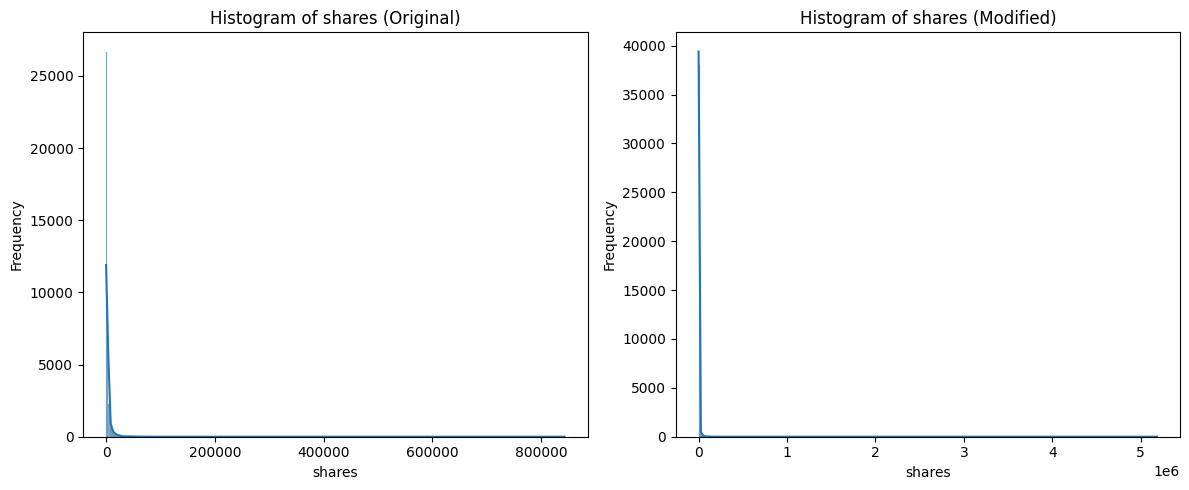

In [27]:
# Histograms for 'shares'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_news_df['shares'], kde=True)
plt.title('Histogram of shares (Original)')
plt.xlabel('shares')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(news_df['shares'], kde=True)
plt.title('Histogram of shares (Modified)')
plt.xlabel('shares')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

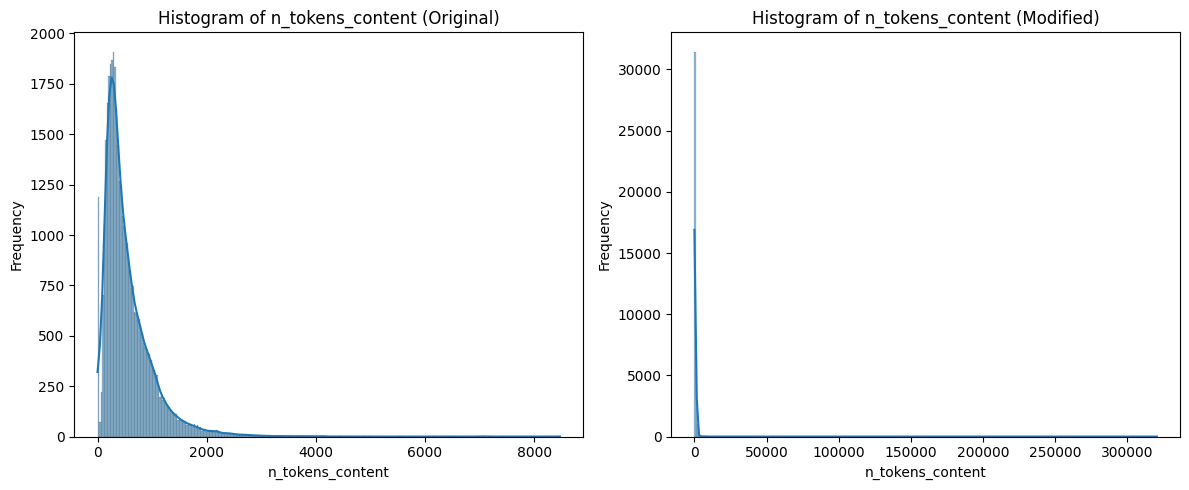

In [28]:
# Histograms for 'n_tokens_content'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_news_df['n_tokens_content'], kde=True)
plt.title('Histogram of n_tokens_content (Original)')
plt.xlabel('n_tokens_content')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(news_df['n_tokens_content'], kde=True)
plt.title('Histogram of n_tokens_content (Modified)')
plt.xlabel('n_tokens_content')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

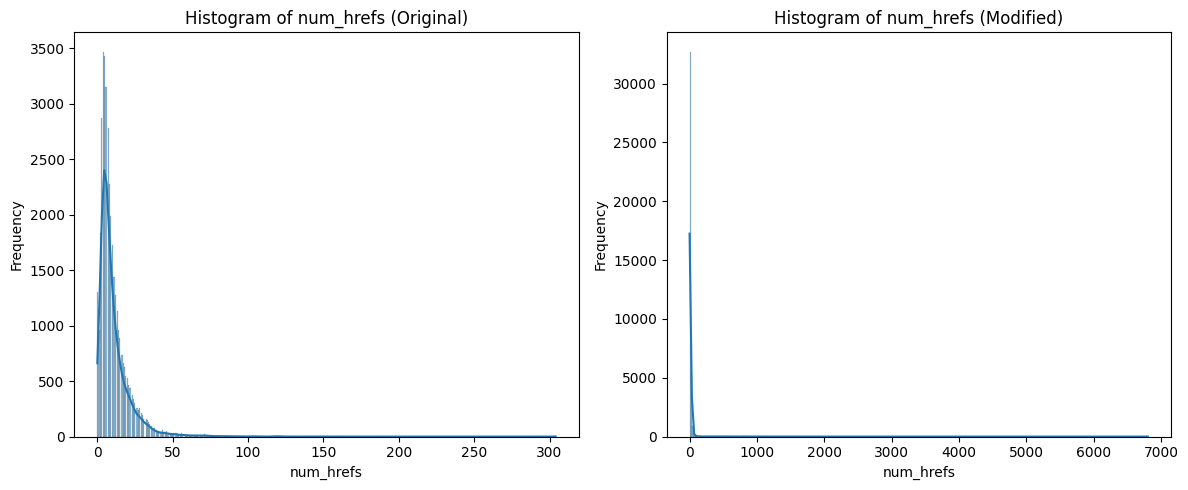

In [29]:
# Histograms for 'num_hrefs'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_news_df['num_hrefs'], kde=True)
plt.title('Histogram of num_hrefs (Original)')
plt.xlabel('num_hrefs')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(news_df['num_hrefs'], kde=True)
plt.title('Histogram of num_hrefs (Modified)')
plt.xlabel('num_hrefs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

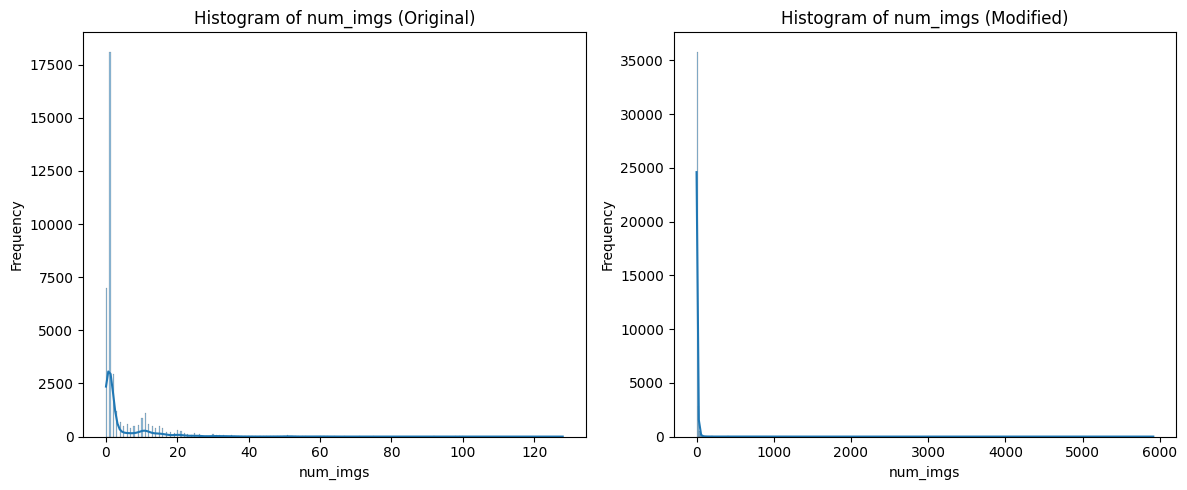

In [30]:
# Histograms for 'num_imgs'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_news_df['num_imgs'], kde=True)
plt.title('Histogram of num_imgs (Original)')
plt.xlabel('num_imgs')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(news_df['num_imgs'], kde=True)
plt.title('Histogram of num_imgs (Modified)')
plt.xlabel('num_imgs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

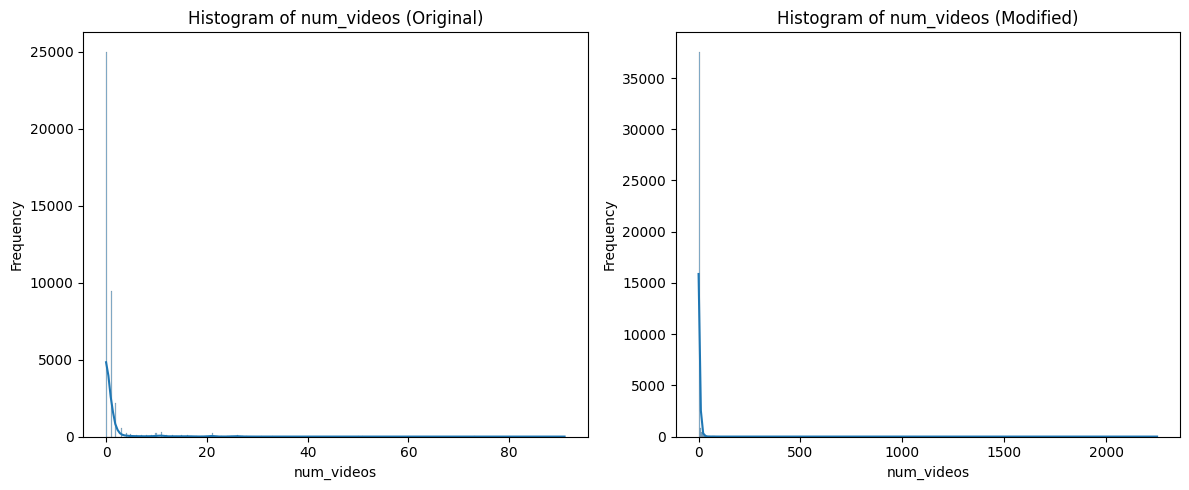

In [31]:
# Histograms for 'num_videos'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_news_df['num_videos'], kde=True)
plt.title('Histogram of num_videos (Original)')
plt.xlabel('num_videos')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(news_df['num_videos'], kde=True)
plt.title('Histogram of num_videos (Modified)')
plt.xlabel('num_videos')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

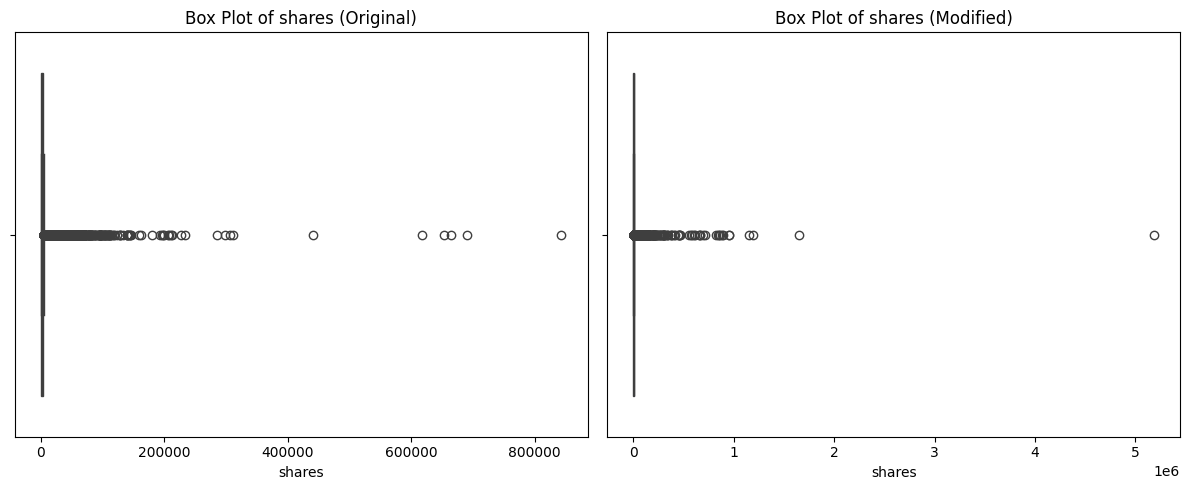

In [32]:
# Box plots for 'shares'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_news_df['shares'])
plt.title('Box Plot of shares (Original)')
plt.xlabel('shares')

plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['shares'])
plt.title('Box Plot of shares (Modified)')
plt.xlabel('shares')
plt.tight_layout()
plt.show()

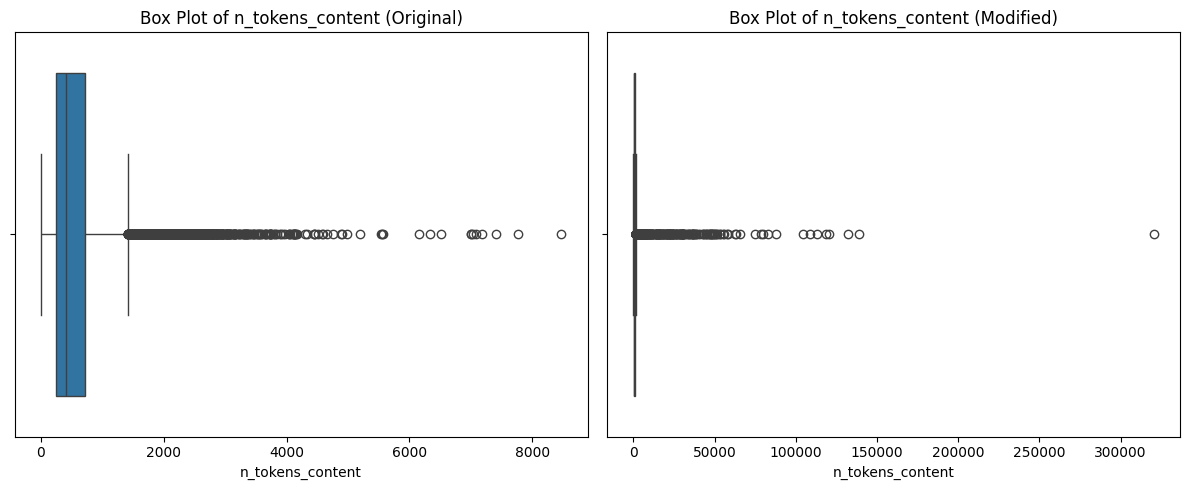

In [33]:
# Box plots for 'n_tokens_content'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_news_df['n_tokens_content'])
plt.title('Box Plot of n_tokens_content (Original)')
plt.xlabel('n_tokens_content')

plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['n_tokens_content'])
plt.title('Box Plot of n_tokens_content (Modified)')
plt.xlabel('n_tokens_content')
plt.tight_layout()
plt.show()

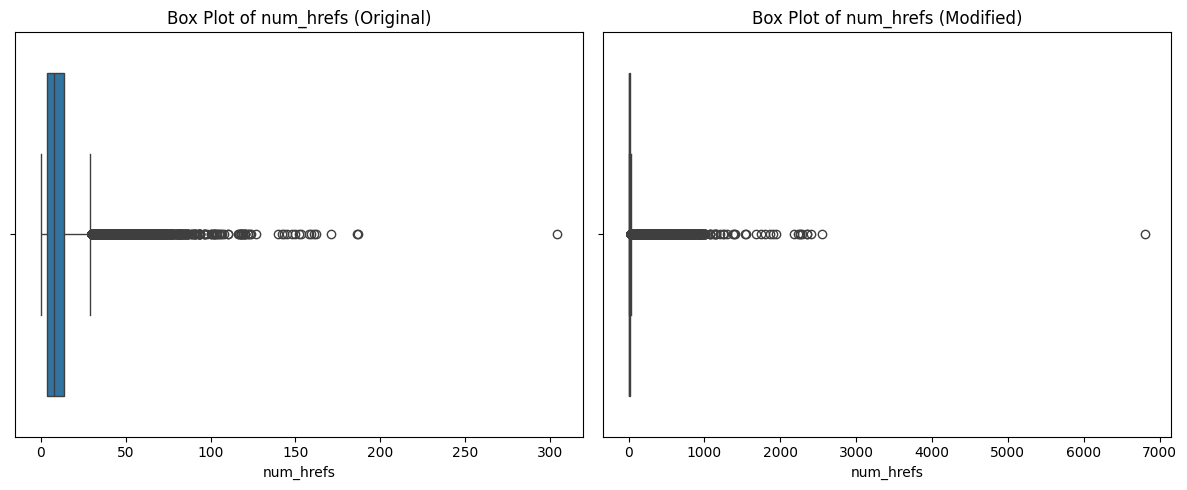

In [34]:
# Box plots for 'num_hrefs'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_news_df['num_hrefs'])
plt.title('Box Plot of num_hrefs (Original)')
plt.xlabel('num_hrefs')

plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['num_hrefs'])
plt.title('Box Plot of num_hrefs (Modified)')
plt.xlabel('num_hrefs')
plt.tight_layout()
plt.show()

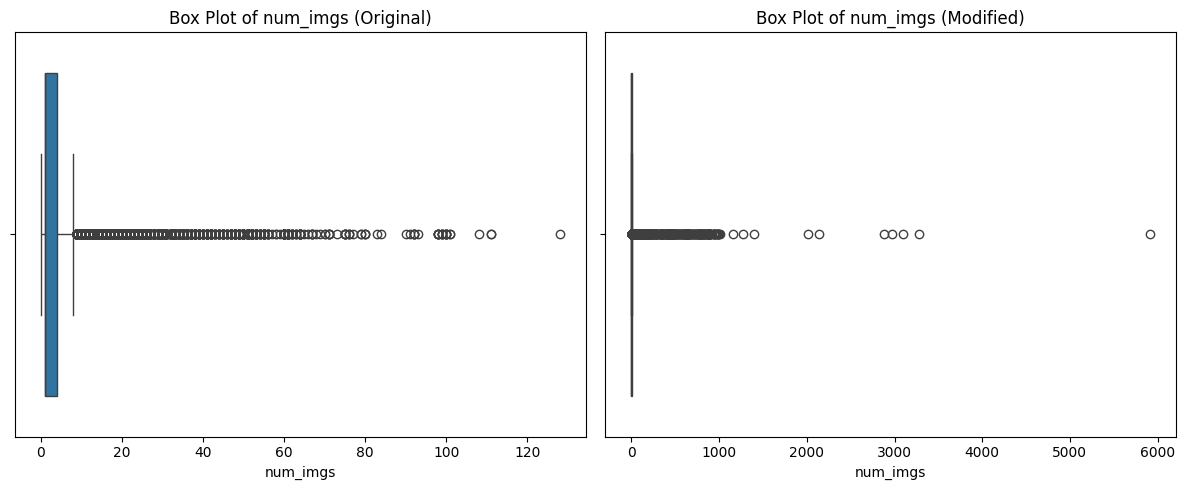

In [35]:
# Box plots for 'num_imgs'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_news_df['num_imgs'])
plt.title('Box Plot of num_imgs (Original)')
plt.xlabel('num_imgs')

plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['num_imgs'])
plt.title('Box Plot of num_imgs (Modified)')
plt.xlabel('num_imgs')
plt.tight_layout()
plt.show()

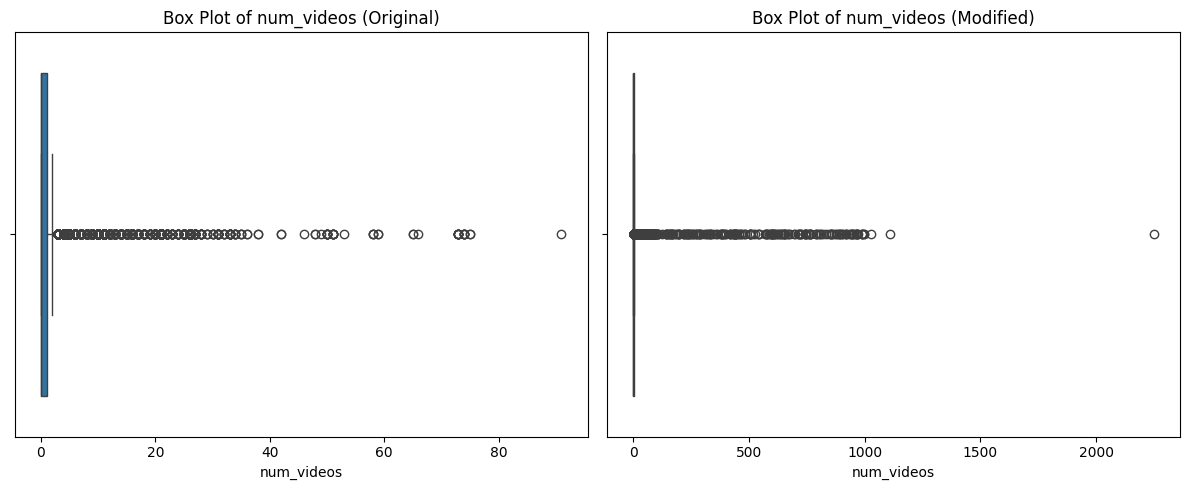

In [36]:
# Box plots for 'num_videos'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_news_df['num_videos'])
plt.title('Box Plot of num_videos (Original)')
plt.xlabel('num_videos')

plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['num_videos'])
plt.title('Box Plot of num_videos (Modified)')
plt.xlabel('num_videos')
plt.tight_layout()
plt.show()

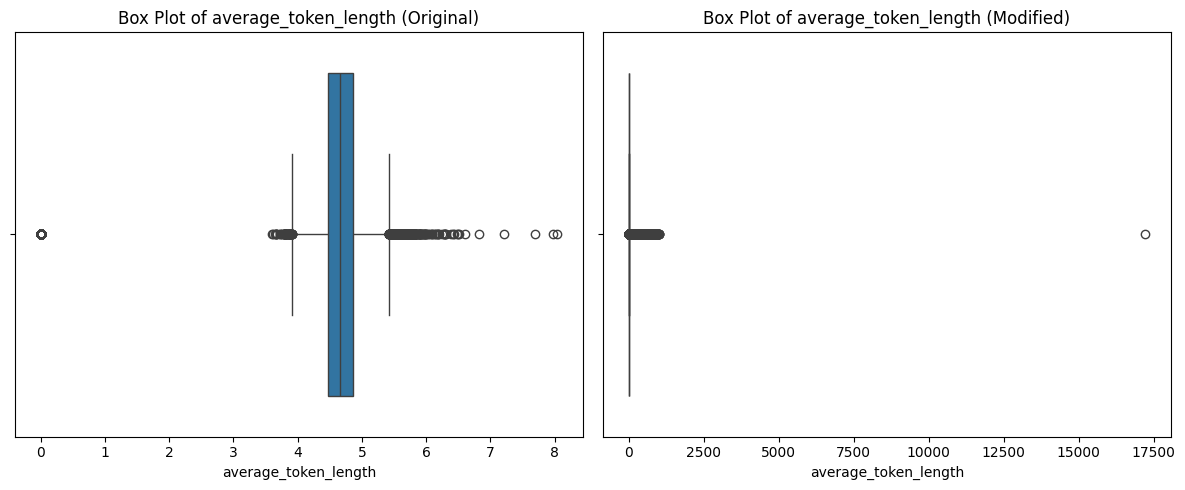

In [37]:
# Box plots for 'average_token_length'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=original_news_df['average_token_length'])
plt.title('Box Plot of average_token_length (Original)')
plt.xlabel('average_token_length')

plt.subplot(1, 2, 2)
sns.boxplot(x=news_df['average_token_length'])
plt.title('Box Plot of average_token_length (Modified)')
plt.xlabel('average_token_length')
plt.tight_layout()
plt.show()

## Seleccionar variables para preprocesamiento





Identificamos las variables numéricas para normalización y las categóricas para codificación, excluyendo la columna 'url' y 'mixed_type_col' en news_df.



In [38]:
numerical_cols_news = news_df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_news = [col for col in numerical_cols_news if col not in ['url', 'mixed_type_col']]

categorical_cols_news = news_df.select_dtypes(include='object').columns.tolist()
categorical_cols_news = [col for col in categorical_cols_news if col not in ['url', 'mixed_type_col']]

numerical_cols_original = original_news_df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_original = [col for col in numerical_cols_original if col not in ['url']]

categorical_cols_original = original_news_df.select_dtypes(include='object').columns.tolist()
categorical_cols_original = [col for col in categorical_cols_original if col not in ['url']]

print("Numerical columns in news_df:", numerical_cols_news)
print("Categorical columns in news_df:", categorical_cols_news)
print("Numerical columns in original_news_df:", numerical_cols_original)
print("Categorical columns in original_news_df:", categorical_cols_original)

Numerical columns in news_df: ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'av

## Normalizar variables numéricas

Aplicamos técnicas de normalización a las variables numéricas seleccionadas en ambos dataframes.


In [39]:
from sklearn.preprocessing import StandardScaler

scaler_news = StandardScaler()
news_df[numerical_cols_news] = scaler_news.fit_transform(news_df[numerical_cols_news])

scaler_original = StandardScaler()
original_news_df[numerical_cols_original] = scaler_original.fit_transform(original_news_df[numerical_cols_original])

display(news_df.head())
display(original_news_df.head())

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,mixed_type_col
0,http://mashable.com/2013/01/07/amazon-instant-...,0.00971,-0.065647,-0.152580,-0.063363,-0.024378,-0.066179,-0.159849,-0.057236,-0.114726,...,-0.070199,-0.018798,-0.025219,-0.142275,-0.061711,-0.068495,-0.019187,-0.026435,-0.107234,bad
1,http://mashable.com/2013/01/07/ap-samsung-spon...,0.00971,-0.113052,-0.140880,-0.064683,-0.024378,-0.066702,-0.172194,-0.067635,-0.114726,...,-0.070199,-0.017632,-0.021813,-0.060021,-0.072901,-0.063859,-0.017208,-0.027841,-0.103888,639
2,http://mashable.com/2013/01/07/apple-40-billio...,0.00971,-0.113052,-0.155179,-0.065348,-0.024378,-0.069563,-0.172194,-0.067635,-0.114726,...,-0.063557,-0.019385,-0.026653,-0.060852,-0.072901,-0.063859,-0.017208,-0.027841,-0.081514,unknown
3,http://mashable.com/2013/01/07/astronaut-notre...,0.00971,-0.113052,-0.051181,-0.066948,-0.024378,-0.069523,-0.098121,-0.078034,-0.114726,...,-0.067985,-0.018897,-0.025219,-0.061683,-0.072901,-0.063859,-0.017208,NaN,-0.090021,688
4,http://mashable.com/2013/01/07/att-u-verse-apps/,0.00971,-0.049845,0.124642,-0.068926,-0.024378,-0.072309,0.025335,0.119553,0.178767,...,-0.063557,-0.018144,NaN,-0.058775,-0.062728,-0.060487,-0.019007,-0.026819,-0.109730,579


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,...,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920,-0.241028
1,http://mashable.com/2013/01/07/ap-samsung-spon...,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,...,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658,-0.230879
2,http://mashable.com/2013/01/07/apple-40-billio...,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,...,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658,-0.163018
3,http://mashable.com/2013/01/07/astronaut-notre...,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,...,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658,-0.188821
4,http://mashable.com/2013/01/07/att-u-verse-apps/,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,...,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056,-0.248596


## Codificar variables categóricas

Aplicamos codificación one-hot a las variables categóricas seleccionadas en ambos dataframes.


In [40]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply one-hot encoding to news_df categorical columns
news_categorical_encoded = ohe.fit_transform(news_df[categorical_cols_news])
news_categorical_df = pd.DataFrame(news_categorical_encoded, columns=ohe.get_feature_names_out(categorical_cols_news))

# Apply one-hot encoding to original_news_df categorical columns
original_news_categorical_encoded = ohe.fit_transform(original_news_df[categorical_cols_original])
original_news_categorical_df = pd.DataFrame(original_news_categorical_encoded, columns=ohe.get_feature_names_out(categorical_cols_original))

display(news_categorical_df.head())
display(original_news_categorical_df.head())

""
0
1
2
3
4


""
0
1
2
3
4


## Reducción de dimensionalidad

Consideramos la aplicación de una técnica de reducción de dimensionalidad ( PCA) si el número de características es muy alto después de la codificación. Evaluar si es necesaria basándose en el análisis exploratorio de datos.


**Reasoning**:
Check the number of columns in both dataframes to determine if dimensionality reduction is necessary.



In [41]:
print("Number of columns in news_df:", news_df.shape[1])
print("Number of columns in original_news_df:", original_news_df.shape[1])

Number of columns in news_df: 62
Number of columns in original_news_df: 61


## Resumen hasta ahora:

### Hallazgos del análisis de datos

*   Las variables numéricas tanto en `news_df` como en `original_news_df` se normalizaron exitosamente usando `StandardScaler`.
*   El paso de one-hot encoding dio como resultado dataframes vacios porque no hay varables categoricas.
*   La reducción de dimensionalidad se puede considerar innecesaria ya que el número de features (60) no se consideró excesivamente alto.




In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [43]:
# Configuration
TEST_SIZE = 0.20
RANDOM_STATE = 42
CLASSIFICATION_THRESHOLD = 0.75

In [44]:
# Utility functions
def rmse(y_true, y_pred):
    try:
        return mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        return np.sqrt(mean_squared_error(y_true, y_pred))


def evaluate_regression_model(y_true, y_pred, model_name):
    rmse_val = rmse(y_true, y_pred)
    r2_val = r2_score(y_true, y_pred)
    print(f"\n{model_name}")
    print("=" * 60)
    print(f"RMSE: {rmse_val:.4f} | R²: {r2_val:.4f}")
    return {'rmse': rmse_val, 'r2': r2_val}


def evaluate_classification_model(y_true, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    try:
        auc = roc_auc_score(y_true, y_pred_proba)
    except:
        auc = None

    print(f"\n{model_name}")
    print("=" * 60)
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    if auc:
        print(f"ROC-AUC:   {auc:.4f}")

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc}


def safe_qcut_bins(y_series, q_candidates=(10, 8, 6, 5, 4), min_bin_size=30):
    y_series = pd.Series(y_series).astype(float)
    for q in q_candidates:
        try:
            bins = pd.qcut(y_series, q=q, duplicates='drop')
            counts = bins.value_counts(dropna=False)
            if counts.min() >= min_bin_size and counts.size >= 2:
                return bins
        except ValueError:
            continue
    return None

In [45]:
# Data exploration
print("=" * 60)
print("DATA EXPLORATION")
print("=" * 60)

df = original_news_df.copy()

print(f"\nDataset shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")

if 'shares' in df.columns:
    print(f"\nTarget Statistics:")
    print(f"  Mean: {df['shares'].mean():.2f}")
    print(f"  Median: {df['shares'].median():.2f}")
    print(f"  Std: {df['shares'].std():.2f}")
    print(f"  Min: {df['shares'].min():.2f}")
    print(f"  Max: {df['shares'].max():.2f}")

DATA EXPLORATION

Dataset shape: (39644, 61)
Missing values: 0

Target Statistics:
  Mean: 0.00
  Median: -0.17
  Std: 1.00
  Min: -0.29
  Max: 72.24


In [46]:
# Data preparation
print("\n" + "=" * 60)
print("DATA PREPARATION")
print("=" * 60)

cols_to_drop = [c for c in ['shares', 'url'] if c in df.columns]
X = df.drop(columns=cols_to_drop, errors='ignore')
y = df['shares'].copy()

if X.isnull().sum().sum() > 0:
    X = X.fillna(X.median())

nunique = X.nunique()
constant_cols = nunique[nunique == 1].index.tolist()
if constant_cols:
    X = X.drop(columns=constant_cols)

potential_categorical = [col for col in X.columns
                         if X[col].nunique() < 10 and X[col].dtype in ['int64', 'float64']]

if potential_categorical:
    X = pd.get_dummies(X, columns=potential_categorical, drop_first=True)
    X = X.astype(float)

if np.isinf(X.values).any():
    X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())

print(f"Final feature matrix: {X.shape}")

if y.mean() < 0.1 and abs(y.std() - 1.0) < 0.1:
    y_reg = y.copy()
else:
    y_reg = np.log1p(y)

threshold = y.quantile(CLASSIFICATION_THRESHOLD)
y_class = (y > threshold).astype(int)

print(f"\nClassification Target (Top {int((1-CLASSIFICATION_THRESHOLD)*100)}%):")
print(f"  Low shares:  {(y_class == 0).sum()} ({(y_class == 0).sum()/len(y_class)*100:.1f}%)")
print(f"  High shares: {(y_class == 1).sum()} ({(y_class == 1).sum()/len(y_class)*100:.1f}%)")


DATA PREPARATION
Final feature matrix: (39644, 59)

Classification Target (Top 25%):
  Low shares:  30014 (75.7%)
  High shares: 9630 (24.3%)


In [47]:
# feature correlation analysis
print("\n" + "=" * 60)
print("FEATURE CORRELATION ANALYSIS")
print("=" * 60)

if X.shape[1] < 100:
    correlation_matrix = X.corr().abs()
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )
    high_corr_features = [col for col in upper_triangle.columns
                          if any(upper_triangle[col] > 0.95)]

    if high_corr_features:
        print(f"Removing {len(high_corr_features)} highly correlated features")
        X = X.drop(columns=high_corr_features)
        print(f"Final features: {X.shape[1]}")


FEATURE CORRELATION ANALYSIS
Removing 2 highly correlated features
Final features: 57


In [48]:
# train-test split
print("\n" + "=" * 60)
print("TRAIN/TEST SPLIT")
print("=" * 60)

y_bins = safe_qcut_bins(y, q_candidates=(10, 8, 6, 5, 4), min_bin_size=30)
stratify_param = y_bins if y_bins is not None else None

X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_reg, y_class,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=stratify_param
)

print(f"Training: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing:  {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")


TRAIN/TEST SPLIT
Training: 31715 samples (80.0%)
Testing:  7929 samples (20.0%)


In [56]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.set_experiment("Equipo15 Fase 2 Cesar P.")

2025/10/28 17:48:35 INFO mlflow.tracking.fluent: Experiment with name 'Equipo15 Fase 2 Cesar P.' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/653983472685803158', creation_time=1761695315757, experiment_id='653983472685803158', last_update_time=1761695315757, lifecycle_stage='active', name='Equipo15 Fase 2 Cesar P.', tags={}>

REGRESSION MODELS

In [62]:
# regression models

with mlflow.start_run():

    print("\n" + "=" * 80)
    print("REGRESSION MODELS")
    print("=" * 80)

    print("\nTraining Ridge Regression...")
    params_ridge = {
        'alpha': 1.0, 'random_state': 42
    }

    pipe_ridge = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(**params_ridge))
    ])
    pipe_ridge.fit(X_train, y_reg_train)
    y_reg_pred_ridge = pipe_ridge.predict(X_test)
    results_ridge = evaluate_regression_model(y_reg_test, y_reg_pred_ridge, "Ridge Regression")

    mlflow.log_params(params_ridge)
    mlflow.log_metric("rmse", results_ridge['rmse'])
    mlflow.log_metric("r2", results_ridge['r2'])

    signature = infer_signature(X_train, pipe_ridge.predict(X_train))

    model_info = mlflow.sklearn.log_model(
        sk_model=pipe_ridge,
        name="Ridge_Regression_Model",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-Ridge-Regression-Model"
    )

    mlflow.set_logged_model_tags(
        model_info.model_id,
        {
            "Training Info": "Basic Ridge Regression model for iris data",
            "Developer": "Cesar Prieto",
            "Version": "1.0.0",
            "Data Source": "Online News Popularity Dataset"        
        }
    )


    print("\nTraining Random Forest Regressor...")
    rf_reg = RandomForestRegressor(
        n_estimators=100, max_depth=15, min_samples_leaf=5,
        min_samples_split=10, max_features='sqrt', max_samples=0.8,
        n_jobs=-1, random_state=RANDOM_STATE
    )
    rf_reg.fit(X_train, y_reg_train)
    y_reg_pred_rf = rf_reg.predict(X_test)
    results_rf_reg = evaluate_regression_model(y_reg_test, y_reg_pred_rf, "Random Forest")

    print("\nTraining Gradient Boosting Regressor...")
    gb_reg = HistGradientBoostingRegressor(
        learning_rate=0.05, max_depth=5, max_bins=255,
        l2_regularization=1.0, max_iter=200, early_stopping=True,
        validation_fraction=0.1, n_iter_no_change=20, random_state=RANDOM_STATE
    )
    gb_reg.fit(X_train, y_reg_train)
    y_reg_pred_gb = gb_reg.predict(X_test)
    results_gb_reg = evaluate_regression_model(y_reg_test, y_reg_pred_gb, "Gradient Boosting")


REGRESSION MODELS

Training Ridge Regression...

Ridge Regression
RMSE: 1.2771 | R²: 0.0155


c:\Users\priet\OneDrive\Documents\GitHub\MLOpsEq15\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Successfully registered model 'tracking-Ridge-Regression-Model'.
2025/10/28 18:01:53 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-Ridge-Regression-Model, version 1
Created version '1' of model 'tracking-Ridge-Regression-Model'.



Training Random Forest Regressor...

Random Forest
RMSE: 1.2746 | R²: 0.0193

Training Gradient Boosting Regressor...

Gradient Boosting
RMSE: 1.2799 | R²: 0.0111
🏃 View run colorful-snipe-239 at: http://127.0.0.1:5000/#/experiments/653983472685803158/runs/cf9b533810c34222b7abf0f9ea4cad12
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/653983472685803158


In [63]:
import mlflow
from mlflow.models import infer_signature
from sklearn.pipeline import Pipeline

def train_and_log_model(
    model_class,
    model_name: str,
    params: dict,
    X_train,
    X_test,
    y_train,
    y_test,
    evaluate_fn,
    task_type: str = "regression",
    preprocessing_steps=None,
    registered_model_prefix: str = "tracking-",
    developer: str = "Cesar Prieto",
    data_source: str = "Online News Popularity Dataset"
):
    """
    Entrena y registra un modelo con MLflow.

    Parámetros
    ----------
    model_class : class
        Clase del modelo de sklearn (por ejemplo, Ridge, RandomForestRegressor, etc.)
    model_name : str
        Nombre del modelo (para MLflow y registro)
    params : dict
        Diccionario de hiperparámetros para el modelo
    X_train, X_test, y_train, y_test : arrays o DataFrames
        Datos de entrenamiento y prueba
    evaluate_fn : function
        Función que reciba (y_true, y_pred, model_name) y devuelva un dict de métricas
    task_type : str, optional
        "regression" o "classification"
    preprocessing_steps : list of tuples, optional
        Pasos del pipeline antes del modelo (por ejemplo: [("scaler", StandardScaler())])
    registered_model_prefix : str
        Prefijo del nombre del modelo registrado en MLflow
    """

    with mlflow.start_run():
        print("\n" + "=" * 80)
        print(f"TRAINING {model_name.upper()}")
        print("=" * 80)

        # Crear pipeline
        steps = preprocessing_steps if preprocessing_steps else []
        steps.append((model_name.lower(), model_class(**params)))
        pipeline = Pipeline(steps)

        # Entrenar
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Evaluar
        results = evaluate_fn(y_test, y_pred, model_name)

        # Registrar en MLflow
        mlflow.log_params(params)
        for metric_name, metric_value in results.items():
            mlflow.log_metric(metric_name, metric_value)

        # Inferir firma del modelo
        signature = infer_signature(X_train, pipeline.predict(X_train))

        # Guardar modelo
        model_info = mlflow.sklearn.log_model(
            sk_model=pipeline,
            name=f"{model_name}_Model",
            signature=signature,
            input_example=X_train,
            registered_model_name=f"{registered_model_prefix}{model_name}-Model"
        )

        # Agregar etiquetas
        mlflow.set_logged_model_tags(
            model_info.model_id,
            {
                "Training Info": f"Auto-logged {model_name} model",
                "Developer": developer,
                "Version": "1.0.0",
                "Task Type": task_type,
                "Data Source": data_source        
            }
        )

        print(f"✅ Modelo '{model_name}' registrado correctamente en MLflow.")
        return model_info, results


In [64]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Ridge Regression
train_and_log_model(
    model_class=Ridge,
    model_name="Ridge_Regression",
    params={'alpha': 1.0, 'random_state': 42},
    X_train=X_train,
    X_test=X_test,
    y_train=y_reg_train,
    y_test=y_reg_test,
    evaluate_fn=evaluate_regression_model,
    preprocessing_steps=[("scaler", StandardScaler())]
)

# Random Forest
train_and_log_model(
    model_class=RandomForestRegressor,
    model_name="Random_Forest_Regressor",
    params={
        'n_estimators': 100, 'max_depth': 15, 'min_samples_leaf': 5,
        'min_samples_split': 10, 'max_features': 'sqrt', 'max_samples': 0.8,
        'n_jobs': -1, 'random_state': RANDOM_STATE
    },
    X_train=X_train,
    X_test=X_test,
    y_train=y_reg_train,
    y_test=y_reg_test,
    evaluate_fn=evaluate_regression_model
)

# Gradient Boosting
train_and_log_model(
    model_class=HistGradientBoostingRegressor,
    model_name="Gradient_Boosting_Regressor",
    params={
        'learning_rate': 0.05, 'max_depth': 5, 'max_bins': 255,
        'l2_regularization': 1.0, 'max_iter': 200, 'early_stopping': True,
        'validation_fraction': 0.1, 'n_iter_no_change': 20, 'random_state': RANDOM_STATE
    },
    X_train=X_train,
    X_test=X_test,
    y_train=y_reg_train,
    y_test=y_reg_test,
    evaluate_fn=evaluate_regression_model
)


TRAINING RIDGE_REGRESSION

Ridge_Regression
RMSE: 1.2771 | R²: 0.0155


Successfully registered model 'tracking-Ridge_Regression-Model'.
2025/10/28 18:08:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-Ridge_Regression-Model, version 1
Created version '1' of model 'tracking-Ridge_Regression-Model'.


✅ Modelo 'Ridge_Regression' registrado correctamente en MLflow.
🏃 View run worried-hog-784 at: http://127.0.0.1:5000/#/experiments/653983472685803158/runs/13c9df9fc32441dab81e20db35a2f7d5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/653983472685803158

TRAINING RANDOM_FOREST_REGRESSOR

Random_Forest_Regressor
RMSE: 1.2746 | R²: 0.0193


Successfully registered model 'tracking-Random_Forest_Regressor-Model'.
2025/10/28 18:08:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-Random_Forest_Regressor-Model, version 1
Created version '1' of model 'tracking-Random_Forest_Regressor-Model'.


✅ Modelo 'Random_Forest_Regressor' registrado correctamente en MLflow.
🏃 View run casual-goose-658 at: http://127.0.0.1:5000/#/experiments/653983472685803158/runs/2af51813e7054905b11e52a0d2add829
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/653983472685803158

TRAINING GRADIENT_BOOSTING_REGRESSOR

Gradient_Boosting_Regressor
RMSE: 1.2799 | R²: 0.0111


Successfully registered model 'tracking-Gradient_Boosting_Regressor-Model'.
2025/10/28 18:08:51 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-Gradient_Boosting_Regressor-Model, version 1


✅ Modelo 'Gradient_Boosting_Regressor' registrado correctamente en MLflow.
🏃 View run loud-dolphin-176 at: http://127.0.0.1:5000/#/experiments/653983472685803158/runs/127f6e831be9475dbf6c2a10c516d7fc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/653983472685803158


Created version '1' of model 'tracking-Gradient_Boosting_Regressor-Model'.


(<mlflow.models.model.ModelInfo at 0x1c2914c7380>,
 {'rmse': np.float64(1.2798968811936373), 'r2': 0.011146592669086242})

CLASSIFICATION MODELS

In [50]:
# Classification models
print("\n" + "=" * 80)
print("CLASSIFICATION MODELS")
print("=" * 80)

print("\nTraining Logistic Regression...")
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(C=1.0, max_iter=1000, random_state=RANDOM_STATE))
])
pipe_lr.fit(X_train, y_class_train)
y_class_pred_lr = pipe_lr.predict(X_test)
y_class_proba_lr = pipe_lr.predict_proba(X_test)[:, 1]
results_lr = evaluate_classification_model(
    y_class_test, y_class_pred_lr, y_class_proba_lr, "Logistic Regression"
)

print("\nTraining Random Forest Classifier...")
rf_clf = RandomForestClassifier(
    n_estimators=100, max_depth=15, min_samples_leaf=5,
    min_samples_split=10, max_features='sqrt', class_weight='balanced',
    n_jobs=-1, random_state=RANDOM_STATE
)
rf_clf.fit(X_train, y_class_train)
y_class_pred_rf = rf_clf.predict(X_test)
y_class_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
results_rf_clf = evaluate_classification_model(
    y_class_test, y_class_pred_rf, y_class_proba_rf, "Random Forest"
)

print("\nTraining Gradient Boosting Classifier...")
gb_clf = HistGradientBoostingClassifier(
    learning_rate=0.05, max_depth=5, max_bins=255,
    l2_regularization=1.0, max_iter=200, early_stopping=True,
    validation_fraction=0.1, n_iter_no_change=20, random_state=RANDOM_STATE
)
gb_clf.fit(X_train, y_class_train)
y_class_pred_gb = gb_clf.predict(X_test)
y_class_proba_gb = gb_clf.predict_proba(X_test)[:, 1]
results_gb_clf = evaluate_classification_model(
    y_class_test, y_class_pred_gb, y_class_proba_gb, "Gradient Boosting"
)


CLASSIFICATION MODELS

Training Logistic Regression...

Logistic Regression
Accuracy:  0.7605
Precision: 0.5326
Recall:    0.0978
F1-Score:  0.1653
ROC-AUC:   0.6891

Training Random Forest Classifier...

Random Forest
Accuracy:  0.7368
Precision: 0.4538
Recall:    0.4220
F1-Score:  0.4373
ROC-AUC:   0.7178

Training Gradient Boosting Classifier...

Gradient Boosting
Accuracy:  0.7671
Precision: 0.5796
Recall:    0.1420
F1-Score:  0.2282
ROC-AUC:   0.7214


In [51]:
# model comparison
print("\n" + "=" * 60)
print("REGRESSION MODEL COMPARISON")
print("=" * 60)
reg_comparison = {
    'Ridge': results_ridge['r2'],
    'Random Forest': results_rf_reg['r2'],
    'Gradient Boosting': results_gb_reg['r2']
}
for name, r2 in sorted(reg_comparison.items(), key=lambda x: x[1], reverse=True):
    print(f"{name:25s}: R² = {r2:.4f}")

print("\n" + "=" * 60)
print("CLASSIFICATION MODEL COMPARISON")
print("=" * 60)
clf_comparison = {
    'Logistic Regression': results_lr,
    'Random Forest': results_rf_clf,
    'Gradient Boosting': results_gb_clf
}
for name, res in sorted(clf_comparison.items(), key=lambda x: x[1]['f1'], reverse=True):
    print(f"{name:25s}: F1={res['f1']:.4f}, Acc={res['accuracy']:.4f}")

best_clf_name = max(clf_comparison.items(), key=lambda x: x[1]['f1'])[0]
print(f"\nBest Classification Model: {best_clf_name}")


REGRESSION MODEL COMPARISON
Random Forest            : R² = 0.0193
Ridge                    : R² = 0.0155
Gradient Boosting        : R² = 0.0111

CLASSIFICATION MODEL COMPARISON
Random Forest            : F1=0.4373, Acc=0.7368
Gradient Boosting        : F1=0.2282, Acc=0.7671
Logistic Regression      : F1=0.1653, Acc=0.7605

Best Classification Model: Random Forest


In [52]:
# confusion matrix
print("\n" + "=" * 60)
print(f"CONFUSION MATRIX - {best_clf_name}")
print("=" * 60)

if best_clf_name == 'Logistic Regression':
    y_pred_best = y_class_pred_lr
elif best_clf_name == 'Random Forest':
    y_pred_best = y_class_pred_rf
else:
    y_pred_best = y_class_pred_gb

cm = confusion_matrix(y_class_test, y_pred_best)
print("\n                Predicted")
print("              Low    High")
print(f"Actual Low   {cm[0,0]:5d}  {cm[0,1]:5d}")
print(f"      High   {cm[1,0]:5d}  {cm[1,1]:5d}")


CONFUSION MATRIX - Random Forest

                Predicted
              Low    High
Actual Low    5031    976
      High    1111    811


In [53]:
# feature importance
print("\n" + "=" * 60)
print("TOP 15 IMPORTANT FEATURES")
print("=" * 60)

if best_clf_name == 'Random Forest':
    importances = rf_clf.feature_importances_
elif best_clf_name == 'Gradient Boosting':
    importances = gb_clf.feature_importances_
else:
    importances = np.abs(pipe_lr.named_steps['lr'].coef_[0])

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

for idx, row in feature_importance.head(15).iterrows():
    print(f"{row['feature']:40s}: {row['importance']:.4f}")


TOP 15 IMPORTANT FEATURES
kw_avg_avg                              : 0.0759
kw_max_avg                              : 0.0569
self_reference_min_shares               : 0.0371
self_reference_avg_sharess              : 0.0367
LDA_02                                  : 0.0351
kw_min_avg                              : 0.0301
timedelta                               : 0.0300
global_subjectivity                     : 0.0278
LDA_01                                  : 0.0277
average_token_length                    : 0.0277
kw_avg_max                              : 0.0276
LDA_03                                  : 0.0276
n_unique_tokens                         : 0.0270
LDA_04                                  : 0.0265
self_reference_max_shares               : 0.0263


In [55]:
# summary
print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
best_reg_r2 = max(reg_comparison.values())
best_clf_f1 = max([r['f1'] for r in clf_comparison.values()])
print(f"Best Regression R²: {best_reg_r2:.4f}")
print(f"Best Classification F1: {best_clf_f1:.4f}")
recommendation = 'Classification' if best_clf_f1 > 0.3 else 'Further feature engineering needed'
print(f"\nRecommendation: {recommendation}")


SUMMARY
Best Regression R²: 0.0193
Best Classification F1: 0.4373

Recommendation: Classification


Se desarrollaron y evaluaron modelos de aprendizaje automático para predecir patrones de compartición en redes sociales de artículos de noticias en línea, utilizando enfoques de regresión y clasificación.

**Metodología**
- Conjunto de datos: 39,644 artículos con 59 características
- División Entrenamiento/Prueba: 80/20 con muestreo estratificado
- Modelos evaluados: Regresión Ridge, Random Forest, Gradient Boosting
- Variable objetivo: Compartidos de artículos (preprocesados y estandarizados)

**Hallazgos Principales**
Enfoque de Regresión (Predicción de Conteos Exactos de Compartidos)

- Mejor modelo: Random Forest (R² = 0.019)
- Resultado: Los modelos explican solo el 2% de la varianza en los conteos de compartidos
- Conclusión: La regresión no es viable para esta tarea de predicción

**Enfoque de Clasificación (Predicción de Compartidos Altos vs Bajos)**

- Mejor modelo: Random Forest
  - F1-Score: 0.437
  - Exactitud: 73.7%
  - Identifica correctamente 811 de 1,922 artículos con compartidos altos (42% de recall)
  - 83.7% de precisión en predicciones de compartidos bajos

**Características Más Predictivas:**
- Métricas de palabras clave (kw_avg_avg, kw_max_avg)
- Historial de compartidos de auto-referencia
- Distribución de temas (componentes LDA)
- Características de contenido (subjetividad, longitud de tokens)
- Tiempo de publicación (timedelta)

**Recomendaciones**

- Implementar Random Forest Classifier para priorización de contenido y estrategia de marketing
- Enfocarse en clasificación sobre regresión - predecir categorías alto/bajo es 22 veces más efectivo que predecir conteos exactos
- Insights de Estrategia de Contenido: Aprovechar la optimización de palabras clave y patrones históricos de auto-referencia como impulsores principales
- Aceptar Limitaciones Inherentes: La viralidad en redes sociales contiene aleatoriedad significativa; un F1-score de 0.44 representa un rendimiento sólido para este dominio

El modelo de clasificación proporciona insights accionables para la curación de contenido, permitiendo la identificación de artículos potencialmente virales con 44% de exactitud balanceada - una mejora significativa sobre el rendimiento base para decisiones estratégicas de promoción de contenido.